    NAMA      : NUR RISKI CAHYATI
    KELAS     : SK5A INDRALAYA
    NIM       : 09011181823028
        
        

# Klasifikasi Breast Cancer Benign and Malignant menggunakan SVM 
# (Support Vector Machine) 

### About the Cancer Data

#### Citation Request:
    This breast cancer databases was obtained from the University of Wisconsin
    Hospitals, Madison from Dr. William H. Wolberg.
    
#### Sumber Dataset: https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original)

    Title : Wisconsin Breast Cancer 
    Attribute Information: (class attribute has been moved to last column)
          
        Attribute                     Domain
    -------------------------------------------
     1. Sample code number            id number
     2. Clump Thickness               1 - 10
     3. Uniformity of Cell Size       1 - 10
     4. Uniformity of Cell Shape      1 - 10
     5. Marginal Adhesion             1 - 10
     6. Single Epithelial Cell Size   1 - 10
     7. Bare Nuclei                   1 - 10
     8. Bland Chromatin               1 - 10
     9. Normal Nucleoli               1 - 10
    10. Mitoses                       1 - 10
    11. Class:                        (2 for benign, 4 for malignant)
   

## 1. Import Data from CSV File

    import pandas as pd digunakan untuk membersihkan data kedalam bentuk yang mudah untuk dianalisa yaitu dengan menggunakan tabel
    import numpy as np digunakan untuk menganalisa data, dalam hal ini numpy digunakan untuk operasi matriks
    import matplotlib.pyplot as plt digunakan untuk menampilkan gambar seperti plot

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv (r'C:\Users\user\Prak AI\Dataset\breast_cancer_wisconsiin.csv')
df.columns = ["Sample_Code","Clump","UCell_Size","UCell_Shape","Marginal_Adhesion","SE_CellSize","Bare_Nuclei","Blans_Chromatin","Normal_Nucleoli","Mitoses","Class"]

In [4]:
df

,Sample_Code,Clump,UCell_Size,UCell_Shape,Marginal_Adhesion,SE_CellSize,Bare_Nuclei,Blans_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4
5,1018099,1,1,1,1,2,10,3,1,1,2
6,1018561,2,1,2,1,2,1,3,1,1,2
7,1033078,2,1,1,1,2,1,1,1,5,2
8,1033078,4,2,1,1,2,1,2,1,1,2
9,1035283,1,1,1,1,1,1,3,1,1,2


In [5]:
df.tail()

,Sample_Code,Clump,UCell_Size,UCell_Shape,Marginal_Adhesion,SE_CellSize,Bare_Nuclei,Blans_Chromatin,Normal_Nucleoli,Mitoses,Class
693,776715,3,1,1,1,3,2,1,1,1,2
694,841769,2,1,1,1,2,1,1,1,1,2
695,888820,5,10,10,3,7,3,8,10,2,4
696,897471,4,8,6,4,3,4,10,6,1,4
697,897471,4,8,8,5,4,5,10,4,1,4


In [6]:
df.shape

(698, 11)

In [7]:
df.size

7678

    Total Size dari dataset tersebut yaitu berjumlah 7678 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 11 columns):
Sample_Code          698 non-null int64
Clump                698 non-null int64
UCell_Size           698 non-null int64
UCell_Shape          698 non-null int64
Marginal_Adhesion    698 non-null int64
SE_CellSize          698 non-null int64
Bare_Nuclei          698 non-null object
Blans_Chromatin      698 non-null int64
Normal_Nucleoli      698 non-null int64
Mitoses              698 non-null int64
Class                698 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


##   2. Distribution of the classes

In [9]:
df['Class'].value_counts()

2    457
4    241
Name: Class, dtype: int64

    Dari data diatas, diketahui bahwa dalam Atribut Class terdapat 2 jenis data yaitu:
    1. Benign    = 2
       Dimana pada cancer benign (jinak) memiliki total data berjumlah 457
    2. Malignant = 4
       Dimana pada cancer malignant (ganas) memiliki total data berjumlah 241

In [10]:
benign = df[df['Class']==2][0:457]
malignant = df[df['Class']==4][0:241]

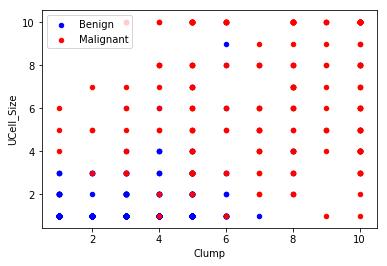

In [11]:
axes = benign.plot(kind = 'scatter',x='Clump',y='UCell_Size',color='blue', label='Benign')
malignant.plot(kind='scatter',x='Clump',y='UCell_Size',color='red',label='Malignant',ax=axes)

In [12]:
df.dtypes

Sample_Code           int64
Clump                 int64
UCell_Size            int64
UCell_Shape           int64
Marginal_Adhesion     int64
SE_CellSize           int64
Bare_Nuclei          object
Blans_Chromatin       int64
Normal_Nucleoli       int64
Mitoses               int64
Class                 int64
dtype: object

    Dari Total Dataset pada Breast Cancer tersebut, dilihat bahwa terdapat 10 data bertipe Int dan 1 data bertipe data Object

## 3. Identification unwanted rows

    Selanjutnya, kita akan mengubah tipedata tersebut menjadi Int, yaitu sebagai berikut:

In [13]:
df =  df[pd.to_numeric(df['Bare_Nuclei'],errors='coerce').notnull()]
df['Bare_Nuclei'] = df['Bare_Nuclei'].astype('int')
df.dtypes

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Sample_Code          int64
Clump                int64
UCell_Size           int64
UCell_Shape          int64
Marginal_Adhesion    int64
SE_CellSize          int64
Bare_Nuclei          int32
Blans_Chromatin      int64
Normal_Nucleoli      int64
Mitoses              int64
Class                int64
dtype: object

## 4. Remove unwanted columns

    Setelah itu, menghapus Kolom yang sekiranya tidak diperlukan dalam mengklasifikasikan dataset, 
    seperti dibawah ini.

In [14]:
df.columns

Index(['Sample_Code', 'Clump', 'UCell_Size', 'UCell_Shape',
       'Marginal_Adhesion', 'SE_CellSize', 'Bare_Nuclei', 'Blans_Chromatin',
       'Normal_Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [15]:
feature_df = df[['Clump', 'UCell_Size', 'UCell_Shape','Marginal_Adhesion', 'SE_CellSize', 'Bare_Nuclei', 'Blans_Chromatin','Normal_Nucleoli','Mitoses']]

x = np.asarray(feature_df)
y = np.asarray(df['Class'])


In [16]:
x[0:698]

array([[ 5,  4,  4, ...,  3,  2,  1],
       [ 3,  1,  1, ...,  3,  1,  1],
       [ 6,  8,  8, ...,  3,  7,  1],
       ...,
       [ 5, 10, 10, ...,  8, 10,  2],
       [ 4,  8,  6, ..., 10,  6,  1],
       [ 4,  8,  8, ..., 10,  4,  1]], dtype=int64)

In [17]:
y[0:698]

array([2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 4, 4, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 4, 4, 4, 4, 2, 4,
       2, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 2, 4, 2, 4, 4,
       2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 2, 4, 2, 4, 4,
       4, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2,
       2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 4,
       4, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 4, 2, 4, 2, 2, 2,
       4, 4, 2, 4, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2,
       4, 4, 2, 2, 2, 4, 4, 2, 4, 4, 4, 2, 2, 4, 2, 2, 4, 4, 4, 4, 2, 4,
       4, 2, 4, 4, 4, 2, 4, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2,
       4, 2, 4, 4, 4, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 4, 2, 4, 2, 4,
       4, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4, 4, 2, 4, 4, 2, 2, 4, 4, 2, 2,
       4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 4, 2,

## 5.  Devide the data as Train/Test dataset

In [18]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=4)

    Dari data tersebut, kita membagi menjadi Data Train dan Data Test
    Data Train = 80 % dari total data
    Data Test  = 20 % dari total data
    Dengan Klasifikasi sebagai berikut:

In [19]:
x_train.shape

(545, 9)

In [20]:
y_train.shape

(545,)

In [21]:
x_test.shape

(137, 9)

In [22]:
y_test.shape

(137,)

    Berdasarkan dari data diatas, kita dapatkan bahwa jumlah data Train yang digunakan yaitu berjumlah 545 Baris dan 9 kolom.
    Sedangkan,
    Jumlah data Test yang kita gunakan untuk data diatas yaitu berjumlah 137 Baris dan 9 kolom.

## 6. Modelling (SVM with Scikit-learn)


In [23]:
from sklearn import svm
svm.SVC(kernel='linear', gamma='auto', C=2)


SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

    Kernel digunakan untuk melakukan komputasi pada matriks  dimana matriks tersebut berupa bentuk array
    Gamma digunakan sebagai koefisien kernel
    Dimana C merupakan parameter regulasi

In [24]:
classifier = svm.SVC(kernel='linear', gamma='auto', C=2)
classifier.fit(x_train,y_train)
y_predict = classifier.predict(x_test)

## 7. Evaluation (Result)

#### Evaluation data dengan menggunakan Confusion Matrics 

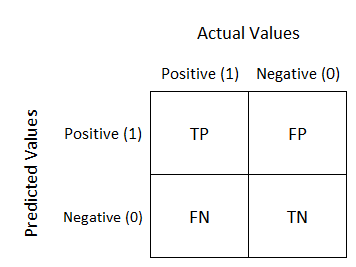
##### Source: https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62

    Penjelasan mengenai Confusion Matrics:
       - Actual Values merupakan Nilai asli dari label/class
       - Predicted Values merupakan Nilai prediksi hasil pemodelan machine learning
    1. TP (True Positive)
       Memprediksi berapa banyak orang yang positive Cancer dan mesin memprediksi positive Cancer
    2. FP (False Positive) => Type Error 1
       Memprediksi berapa banyak orang yang negative Cancer dan mesin memprediksi positive Cancer
    3. FN (False Negative) => Type Error 2
       Memprediksi berapa banyak orang yang positive Cancer dan mesin memprediksi negative Cancer
    4. TN (True Negative)
       Memprediksi berapa banyak orang yang negative Cancer dan mesin memprediksi negative Cancer

In [25]:
from sklearn.metrics import confusion_matrix
df = confusion_matrix(y_test, y_predict)
print(df)

[[80  3]
 [ 3 51]]


    Berdasarkan dari data diatas, didapatkan bahwa:
    1. TP = 80
       Yaitu jumlah orang yang positive Cancer dan mesin memprediksinya positive Cancer berjumlah 80 Orang
    2. FP = 3
       Yaitu jumlah orang yang negative Cancer dan mesin memprediksinya positive Cancer berjumlah 3 Orang
    3. FN = 3
       Yaitu jumlah orang yang positive Cancer dan mesin memprediksinya negative Cancer berjumlah 3 Orang
    4. TN = 51
       Yaitu jumlah orang yang negative Cancer dan mesin memprediksinya negative Cancer berjumlah 51 Orang

In [26]:
tp = df[0,0]
fp = df[0,1]
tn = df[1,1]  
fn = df[1,0] 

In [27]:
precision   = tp / ( tp + fp) * 100
recall      = tp / ( tp + fn) * 100
f1          = ((2*precision*recall) / (precision+recall)) *100
spec        = tn / (tn + fp) *100
akurasi     = (tp+tn)/(tp+tn+fp+fn) *100

    Precision   : Digunakan untuk memprediksi berapa persen akurasi antara data yang diminta dengan hasil prediksi 
                  yang terdapat pada model
    Recall      : Digunakan untuk memprediksi berapa persen keberhasilan model dalam menemukan sebuah informasi
    F1-Score    : Digunakan untuk memprediksi berapa persen perbandingan rata-rata antara precision dan recall
    Specificity : Digunakan untuk memprediksi berapa persen pasien yang negative cancer jika dibandingkan dengan keseluruhan 
                  data yang negative
    Accuracy    : Digunakan untuk memprediksi berapa persen seberapa akurat model dapat mengklasifikasikan data dengan benar
    

In [28]:
print("Precision   : ",precision)
print("Recall      : ",recall)
print("F1-Score    : ",f1)
print("Specificity : ",spec)
print("Accuracy    : ",akurasi)

Precision   :  96.3855421686747
Recall      :  96.3855421686747
F1-Score    :  9638.554216867471
Specificity :  94.44444444444444
Accuracy    :  95.62043795620438


    Dari hasil data diatas, didapatkan bahwa:
    Precision (Akurasi antara data yang diminta dengan hasil prediksi yang terdapat pada model yaitu 96 % )
    Recall (Keberhasilan model dalam menemukan sebuah informasi yaitu 96 % )
    F1-Score (Perbandingan rata-rata antara precision dan recall yaitu 96 % )
    Specificity (Kebenaran data memprediksi negative dibandingkan dengan keseluruhan data negative yaitu 94%)
    Accuracy (Model dapat mengklasifikasikan data dengan benar yaitu 95 % )